In [3]:
from sklearn import datasets
iris = datasets.load_iris() # 导入数据集
X = iris.data # 获得其特征向量
y = iris.target # 获得样本label

# 分割数据集

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [15]:
print(X_test[:4,:],'\n', y_test[:4])

[[5.  3.5 1.3 0.3]
 [6.7 3.1 4.4 1.4]
 [5.7 2.8 4.5 1.3]
 [4.6 3.6 1.  0.2]] 
 [0 1 1 0]


# 数据采样

SMOTE（Synthetic Minority Oversampling Technique），合成少数类过采样技术．它是基于随机过采样算法的一种改进方案，由于随机过采样采取简单复制样本的策略来增加少数类样本，这样容易产生模型过拟合的问题，即使得模型学习到的信息过于特别(Specific)而不够泛化(General)，SMOTE算法的基本思想是对少数类样本进行分析并根据少数类样本人工合成新样本添加到数据集中，具体如下图所示，算法流程如下。

(1)对于少数类中每一个样本x，以欧氏距离为标准计算它到少数类样本集中所有样本的距离，得到其k近邻。

(2)根据样本不平衡比例设置一个采样比例以确定采样倍率N，对于每一个少数类样本x，从其k近邻中随机选择若干个样本，假设选择的近邻为xn。

(3)对于每一个随机选出的近邻xn，分别与原样本按照如下的公式构建新的样本。

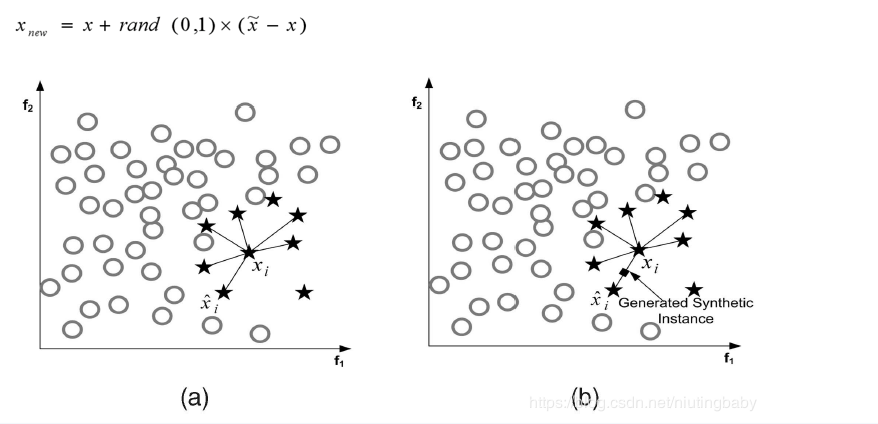

In [33]:
from imblearn.over_sampling import SMOTE # 导入SMOTE算法模块
# 处理不平衡数据
sm = SMOTE(random_state=50)    # 处理过采样的方法
X1, y1 = sm.fit_sample(X_train, y_train.ravel())
X2, y2 = sm.fit_sample(X_test, y_test.ravel())
print(X2,y2)

[[6.         2.2        5.         1.5       ]
 [5.5        2.5        4.         1.3       ]
 [7.3        2.9        6.3        1.8       ]
 [5.7        2.8        4.5        1.3       ]
 [5.1        2.5        3.         1.1       ]
 [4.9        2.5        4.5        1.7       ]
 [5.7        2.8        4.1        1.3       ]
 [7.7        3.8        6.7        2.2       ]
 [6.1        2.6        5.6        1.4       ]
 [5.         3.3        1.4        0.2       ]
 [5.8        2.7        3.9        1.2       ]
 [4.9        3.         1.4        0.2       ]
 [6.7        3.         5.         1.7       ]
 [5.4        3.9        1.7        0.4       ]
 [5.1        3.5        1.4        0.3       ]
 [5.         3.5        1.3        0.3       ]
 [6.         2.9        4.5        1.5       ]
 [7.2        3.         5.8        1.6       ]
 [4.4        2.9        1.4        0.2       ]
 [4.9        3.1        1.5        0.2       ]
 [6.5        2.8        4.6        1.5       ]
 [5.2        

In [ ]:
# 数据变换
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
# 定义线性回归模型
model = LinearRegression(fit_intercept=True, normalize=False, 
    copy_X=True, n_jobs=1)

In [88]:
# 拟合模型
model.fit(X_train, y_train)
# 模型预测
print(model.predict(X_test))

# 获得这个模型的参数
print(model.get_params())
# 为模型进行打分
print('model得分：',model.score(X, y)) # 线性回归：R square； 分类问题： acc

[ 1.53812029  1.74235595  0.95589497  1.81262307  2.06756067  1.81610621
  1.71194718  0.17192101  0.15346967  1.34355136  1.67944744  1.31010223
 -0.12646479  1.85469462  1.0266983   0.05945399  1.9977208   0.00604589
  0.91547121  1.06459403  1.75142726  0.82514677  1.71246746  1.69619974
  1.4907811   1.56411021 -0.01719421  1.17773967  2.0723635  -0.11722718
  0.09975511  1.35812004  1.1839567  -0.0181379   0.20205105  1.16452027
 -0.06069403  0.00958675  1.28113539  1.19394396  1.13627534  1.69966921
  1.54738564  1.51890339 -0.17941378]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}
model得分： -3.423775689309803


In [76]:
# 输出模型的参数
print(model.coef_)
print(model.intercept_)

[[-0.03574175  0.45085313 -0.87618924 -0.39810676]
 [-0.15228427  0.13536379 -0.49069375 -0.23688664]
 [ 0.52050649  0.52151407 -1.77075677 -1.56275537]]
[1.38276406 2.28933995 6.57294016]


In [ ]:
# 参数列表
sklearn.model_selection.cross_val_score(
    estimator, 
    X, 
    y=None, 
    groups=None, 
    scoring=None, 
    cv='warn', 
    n_jobs=None, 
    verbose=0, 
    fit_params=None, 
    pre_dispatch='2*n_jobs', 
    error_score='raise-deprecating')

3.1 必选参数部分：

estimator：就是自己选定的模型；

X：array类型数据。训练集（自变量部分）；

3.2）可选参数部分：
y：array类型数据。训练集（因变量部分）；

cv：int类型。设定cross-validation的维度。输入可以是：

· 测试最优k-fold值的 & 迭代产生的序列，

· 整数：自行设定k-fold的值，

· 不设定cv：使用默认值3，即k-fold=3，

· 用作交叉验证迭代器的对象，

scoring: 打分参数——‘accuracy’、‘f1’、‘precision’、‘recall’ 、‘roc_auc’、'neg_log_loss'等等

官方文档：https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

In [77]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, scoring=None, cv=3, n_jobs=1)

print(cv_scores)

[0.97142857 1.         0.94285714]


# 交叉验证

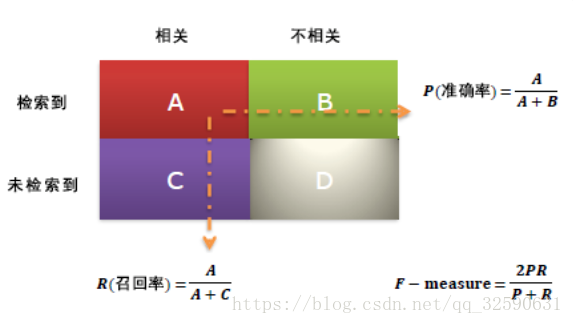

分类问题：

准确率（precision）也就是被分类器检测到的数据中 分类正确的部分

召回率（recall）就是 正类中被分类正确的部分

而F1值就是 准确率和召回率的调和平均数

在实际应用中，如果是做搜索类的问题，那就是在保证召回率的情况下提升准确率

在做垃圾邮件检测之类的问题，就是要保证准确率的情况下提升召回率

具体也就是遇到具体问题看两者的权衡

如果两者都要求高，那就需要保证较高的F1 score

回归类（Regression）问题：

比较常用的是 'neg_mean_squared_error‘ 也就是 均方差回归损失

该统计参数是预测数据和原始数据对应点误差的平方和的均值

# 验证曲线是什么

验证曲线和学习曲线的区别是，横轴为某个超参数的一系列值，由此来看不同参数设置下模型准确率，而不是不同训练集大小下的准确率。

从验证曲线上可以看到随着超参数设置的改变，模型可能从欠拟合到合适再到过拟合的过程，进而选择一个合适的位置，来提高模型的性能。

需要注意的是如果我们使用验证分数来优化超参数，那么该验证分数是有偏差的，它无法再代表模型的泛化能力，我们就需要使用其他测试集来重新评估模型的泛化能力。

即我们需要把一个数据集分成三部分，train、validation和test，我们使用train训练模型，并通过在validation上的表现不断修改超参数值（例如svm中的C值、gamma值等），当模型超参数在validation上表现最优时，我们再使用全新的测试集test进行测试，以此来衡量模型的泛化能力。

不过有时画出单个超参数与训练分数和验证分数的关系图，有助于观察该模型在相应的超参数取值时，是否过拟合或欠拟合的情况发生。

适用场景：

当拥有大量样本可供使用时，可以将数据分为train、validation和test；当样本数量较少时，可以使用交叉验证，但也一定要留出相同的一部分test数据集，在最后使用。而其余部分假如分成了k-fold，就可以循环让k-1fold做训练集，剩下一个fold做验证集。

## 如何解读，以SVM为例

如图是SVM在不同gamma时，它在训练集和交叉验证上的分数：

gamma很小时，训练分数和验证分数都很低，为欠拟合；

gamma逐渐增加时，两个分数都较高，此时模型相对不错；

gamma太高时，训练分数高，验证分数低，学习器会过拟合。

本例中，可以选验证集准确率开始下降，而测试集越来越高那个转折点作为gamma的最优选择。

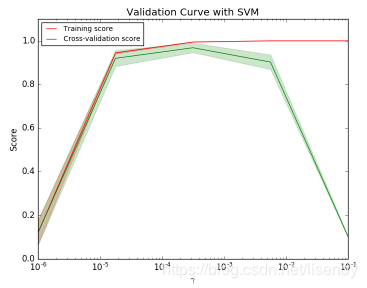

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

In [52]:
param_range = np.logspace(-6, -1, 5)

In [ ]:
# 参数列表
train_score, test_score = validation_curve(model, train_data, train_label, param_name, param_range, cv=None, scoring=None, n_jobs=1)

"""参数
---
    model:用于fit和predict的对象
    X, y: 训练集的特征和标签
    param_name：将被改变的参数的名字
    param_range： 参数的改变范围
    cv：k-fold
   
返回值
---
   train_score: 训练集得分（array）
    test_score: 验证集得分（array）
"""

In [78]:
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)

In [79]:
# 按行求平均
train_scores_mean = np.mean(train_scores, axis =1)
test_scores_mean = np.mean(test_scores, axis =1)

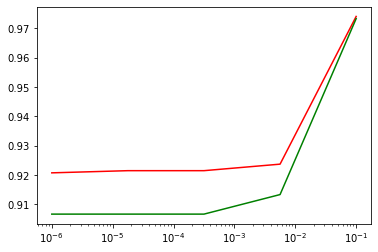

In [80]:
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="g")

# 做成函数

In [81]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection  import validation_curve

In [82]:
def ModelComplexity(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits=10,test_size = 0.2, random_state = 0)

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)
    start = time()
    # Calculate the training and testing scores
    train_scores, test_scores = validation_curve(GradientBoostingRegressor(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'r2')
    print(time()-start)
    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(7, 5))
    plt.title('Gradient Boosting Regressor Complexity Performance')
    plt.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    plt.fill_between(max_depth, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    plt.fill_between(max_depth, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Visual aesthetics
    plt.legend(loc = 'lower right')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Score')
    plt.ylim([-0.05,1.05])
    plt.show()

In [84]:
from sklearn.svm import SVC
model = SVC(C=0.5, kernel='linear', gamma='auto')

model.fit(X_train, y_train)
print(model.predict(X_test))
print(model.get_params())
print('model得分：',model.score(X, y)) # 线性回归：R square； 分类问题： acc

[2 0 1 2 0 1 2 1 0 0 1 1 0 0 1 2 2 1 1 2 2 1 0 2 0 1 2 0 2 2 1 1 2 1 0 2 0
 2 2 1 0 2 0 1 2]
{'C': 0.5, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
model得分： 0.9933333333333333


3.9833452701568604


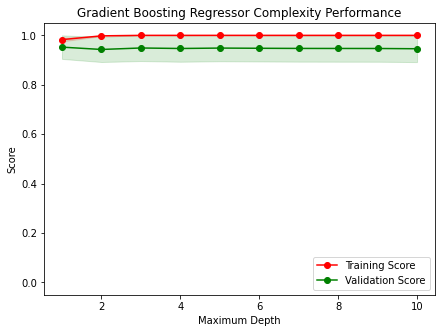

In [85]:
ModelComplexity(X_train, y_train)